## 네이버 지식IN 을 통한 검색을 워드클라우드

- 물론 네이버 개발자 API를 이용하면 훨씬 빠르게 데이타를 가져올 수 있다

- 간단하게 주소창의 주소로 크롤링한다.

- 크롬 개발자모드에서 검색부분을 가져온다 ( 각 dl 태그 )


In [2]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

%matplotlib inline

# 간단한 한글 폰드 등록
from matplotlib import rc
plt.rcParams['axes.unicode_minus']=False
rc('font', family='Malgun Gothic')


In [3]:
# 주소를 약간 수정함

html = 'https://kin.naver.com/search/list.nhn?query={key_word}&page={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여자친구 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [4]:
# 테스트로 첫번째 페이지의 텍스트만 가져온다
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

['\n\n여자친구 선물\n\n2023.04.29.\n여자친구 선물을 고민중인데요ㅜㅜ 제가 왠만한건 다 선물해서 뭘 해야할지 모르겟어요ㅜㅜ 옷 신발 향수 지갑 선물이란 선물은 다 해봐서 뭘 해야할지…  안녕하세요 아직... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 패션잡화\n|\n답변수 14\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여자친구 선물 센스 인정받고픈데\n\n2023.02.07.\n... 시작해서 여자친구 선물을 챙겨주려 하거든요 생각해둔건 인테리어 소품인데 어떤 걸로 여자친구 선물을 해주면 좋을지 잘 몰라서 질문드려요.. 여자친구 선물로 주기 좋은... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 가구, 인테리어소품\n|\n답변수 4\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t|\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t답변 \n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\twhde****\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여자친구 선물\n\n2023.04.19.\n... 26세입니다  안녕하세요^^ 여자친구 선물로 고민이 많으시죠 ㅠㅠ 두분만의 의미있는 실버주얼리 선물은 어떠세요? 의미있는 문구를 담아 세상에 단 하나뿐인... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 가족행사, 이벤트\n|\n답변수 7\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa

In [6]:
#1000 만개 정도의 검색 결과를 읽어온다.
# 첫번째 페이지 start=1, 두번째 페이지인 경우 start=11인거 확인한다.
# 웹 페이지 직접 접근 할 땐느 간단이 time.sleep()으로 요청을 간격적으로 한다.
# 시간이 10분 정도 소요되기에 상태바를 보여준다. ( tqdm.tqdm_notebook 이용)

from urllib.request import urlopen
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1,1000,10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    
    for line in tmp:
        present_candi_text.append(line.text)
    
    time.sleep(0.5)

print(len(present_candi_text))


C:\Users\tjdgh\AppData\Local\Temp\ipykernel_28972\2169556899.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(1,1000,10)):


  0%|          | 0/100 [00:00<?, ?it/s]

1000


In [7]:
# 리스트를 하나의 변수에 저장

present_text = ''
for each_text in present_candi_text:
    present_text += each_text + "\n"

present_text

'\n\n여자친구 선물\n\n2023.04.29.\n여자친구 선물을 고민중인데요ㅜㅜ 제가 왠만한건 다 선물해서 뭘 해야할지 모르겟어요ㅜㅜ 옷 신발 향수 지갑 선물이란 선물은 다 해봐서 뭘 해야할지…  안녕하세요 아직... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 패션잡화\n|\n답변수 14\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n여자친구 선물 센스 인정받고픈데\n\n2023.02.07.\n... 시작해서 여자친구 선물을 챙겨주려 하거든요 생각해둔건 인테리어 소품인데 어떤 걸로 여자친구 선물을 해주면 좋을지 잘 몰라서 질문드려요.. 여자친구 선물로 주기 좋은... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 가구, 인테리어소품\n|\n답변수 4\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t|\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t답변 \n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\twhde****\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n여자친구 선물\n\n2023.04.19.\n... 26세입니다  안녕하세요^^ 여자친구 선물로 고민이 많으시죠 ㅠㅠ 두분만의 의미있는 실버주얼리 선물은 어떠세요? 의미있는 문구를 담아 세상에 단 하나뿐인... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 가족행사, 이벤트\n|\n답변수 7\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\

In [8]:
# 자연어처리
import nltk
from konlpy.tag import Okt
okt = Okt()

tokens_ko = okt.morphs(present_text)
tokens_ko

['\n\n',
 '여자친구',
 '선물',
 '\n\n',
 '2023.04',
 '.',
 '29',
 '.',
 '\n',
 '여자친구',
 '선물',
 '을',
 '고민',
 '중',
 '인데',
 '요',
 'ㅜㅜ',
 '제',
 '가',
 '왠만한건',
 '다',
 '선물',
 '해서',
 '뭘',
 '해야',
 '할지',
 '모르겟어요',
 'ㅜㅜ',
 '옷',
 '신발',
 '향수',
 '지갑',
 '선물',
 '이란',
 '선물',
 '은',
 '다',
 '해봐서',
 '뭘',
 '해야',
 '할지',
 '…',
 '안녕하세요',
 '아직',
 '...',
 'Q',
 '&',
 'A',
 '\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t ',
 '>',
 '패션',
 '잡화',
 '\n',
 '|',
 '\n',
 '답변',
 '수',
 '14',
 '\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t',
 '0',
 '\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n',
 '여자친구',
 '선물',
 '센스',
 '인정받',
 '고픈데',
 '\n\n',
 '2023.02',
 '.',
 '07',
 '.',
 '\n',
 '...',
 '시작',
 '해서',
 '여자친구',
 '선물',
 '을',
 '챙겨주려',
 '하',
 '거든요',
 '생각',
 '해',
 '둔건',
 '인테리어',
 '소품',
 '인데',
 '어떤',
 '걸',
 '로',
 '여자친구',
 '선물',
 '을',
 '해주면',
 '좋을지',
 '잘',
 '몰라서',
 '질문',
 '드려요',
 '..',
 '여자친구',
 '선물',
 '로',
 '주기',
 '좋은',
 '...',
 'Q',
 '&',
 'A',
 '\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t ',
 '>',
 '가구',
 ',',
 '인테리어',
 '소품',
 '\n',
 '|',
 '\n',
 '답변',
 '수',
 '4

In [13]:
ko = nltk.Text(tokens_ko)
print(len(set(ko.tokens)))

1466


In [15]:
ko.vocab().most_common(100)


[('\n', 5469),
 ('.', 2668),
 ('선물', 2194),
 ('여자친구', 2092),
 ('...', 1323),
 ('답변', 1205),
 ('|', 1202),
 ('수', 1006),
 ('Q', 1000),
 ('&', 1000),
 ('A', 1000),
 ('\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t ', 1000),
 ('>', 1000),
 ('\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t', 1000),
 ('\n\n', 995),
 ('0', 987),
 ('..', 820),
 ('\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n', 797),
 ('가', 785),
 (',', 712),
 ('\n\n\n', 574),
 ('뭐', 563),
 ('도', 560),
 ('에', 485),
 ('랑', 455),
 ('추천', 434),
 ('좀', 388),
 ('제', 382),
 ('연애', 382),
 ('거', 376),
 ('입니다', 375),
 ('로', 355),
 ('대', 327),
 ('20', 320),
 ('요', 304),
 ('결혼', 290),
 ('#여자친구선물', 288),
 ('좋을까요', 287),
 ('하는데', 286),
 ('뭘', 285),
 ('3', 280),
 ('#선물추천', 274),
 ('을', 242),
 ('이', 226),
 ('이벤트', 203),
 ('\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t', 202),
 ('\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t', 202),
 ('가족', 202),
 ('행사', 202),
 ('를', 198),
 ('(', 197),
 ('!', 197),
 ('많이', 194),
 ('2', 194),
 ('인', 192),
 ('6', 192),
 ('한', 191),
 ('는',

In [29]:
# 의미없는 단어들을 수동으로 제거해준다.
stop_words = ['\n','\t','\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t','\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t','\n\n'
              ,'\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n','\n\n\n','\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t'
              ,'\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t','\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n'
              ,'\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t ','****)','|','Q','&','A','>','0'
              ,'http://판촉라이프.com/shop/view.php?index_no=330008','\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n'
              ,'.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                          if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('선물', 2194),
 ('여자친구', 2092),
 ('랑', 455),
 ('추천', 434),
 ('연애', 382),
 ('입니다', 375),
 ('결혼', 290),
 ('#여자친구선물', 288),
 ('좋을까요', 287),
 ('하는데', 286),
 ('뭘', 285),
 ('3', 280),
 ('#선물추천', 274),
 ('이벤트', 203),
 ('가족', 202),
 ('행사', 202),
 ('(', 197),
 ('!', 197),
 ('많이', 194),
 ('인', 192),
 ('여자', 190),
 ('15', 190),
 ('안', 189),
 ('저', 189),
 ('#여자친구선물추천', 188),
 ('이라', 188),
 ('하고', 188),
 ('#여자친구', 188),
 ('에서', 188),
 ('5', 187),
 ('아직', 186),
 ('14', 186),
 ('너무', 186),
 ('2023.01', 186),
 ('친구', 186),
 ('기념일', 186),
 ('살', 185),
 ('해서', 184),
 ('편지', 184),
 ('요즘', 183),
 ('2022.12', 183),
 ('#기념일선물', 182),
 ('주고', 182),
 ('반', 182),
 ('사려', 182),
 ('04', 181),
 ('그냥', 181),
 ('무드등', 181),
 ('.!', 181),
 ('내일', 181),
 ('작은', 180),
 ('약간', 180),
 ('#기념일', 180),
 ('#기념일선물추천', 180),
 ('에겐', 180),
 ('인형', 180),
 ('중후', 180),
 ('대학원생', 180),
 ('고민', 115),
 ('화장품', 113),
 ('4', 106),
 ('생일', 105),
 ('11', 104),
 ('분', 102),
 ('안녕하세요', 100),
 ('이번', 100),
 ('??', 100),
 ('지갑', 99),
 ('해'

In [21]:
#!pip install wordcloud

In [34]:
""" 워드 크라우드 그리기 """

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(300)

result = []

for f,s in data:
    result.append(f)

result

resultdata = ' '.join(result)
resultdata


'선물 여자친구 랑 추천 연애 입니다 결혼 #여자친구선물 좋을까요 하는데 뭘 3 #선물추천 이벤트 가족 행사 ( ! 많이 인 여자 15 안 저 #여자친구선물추천 이라 하고 #여자친구 에서 5 아직 14 너무 2023.01 친구 기념일 살 해서 편지 요즘 2022.12 #기념일선물 주고 반 사려 04 그냥 무드등 .! 내일 작은 약간 #기념일 #기념일선물추천 에겐 인형 중후 대학원생 고민 화장품 4 생일 11 분 안녕하세요 이번 ?? 지갑 해 부탁드려요 걸 가방 생각 26 정도 알려주세요 싶은데 이나 ㅜㅜ 9 12 후반 크리스마스 향수 패션 에게 잡화 의미 13 주년 ㅠ 22 꽃다발 같은 이런 하면 때문 없을까요 말 부탁 이구 이제 꽃 에는 2022.07 라면 센스 좋을지 없고 케이스 해줄려고 중학생 드립니다 #연애 나이 만 3일 같은데 이고 어떻게 명품 쥬니버 :) 남자친구 돈 사람 있게 #20대여자친구선물 할수 핸드폰 꺼 지식인 평소 2022.11 해서요 커플링 아니고 #토닥토닥워터 그렇게 처음 되었는데 얼마 주문 뭔가 2020.06 쓰고 내외 있는게 하기 사귄 만나는데 싶고 만나면 어색할 만나서 자주 싸우는데 싸웠으면 좋겠는 바람 싸우지 말길 상징 그런 음 행복하자 퀘스트 주면 2021.12 사귄지도 돼서 좋아하는지도 모르구요 ㅠㅠㅠㅠ 빼구요 ㅠㅠㅠ 또래 여학생 #10대선물추천 #중학생선물추천 회원 로그인 번 원하는 시험 합격 줄까 원하는것도 먹고싶은 없다하니 초보 어렵습니다 24일 차 다도 berr 챙김을 받아서 뭐라도 10만 원 쓰기 산타 루돌프 성탄절 #크리스마스선물추천 #크리스마스선물 #성탄절 #크리스마스여자친구선물 외국 공휴일 심 미생 각 sde 27 조만간 백 사줄건 사줬습니다 20-30만원 #건조과일워터 #건조과일 2007.10 님들 드리는데요 만은 편도 5000원 학교생활 자기 껏 문 알 모릅니다 받기만 2018.07 힘들어 해주거싶네요 ㅈ 집 사무실 #디퓨저추천 #디퓨저 #향추천 #선물용디퓨저 판촉 라이프 드라이 어기 #100일기념선물 목걸

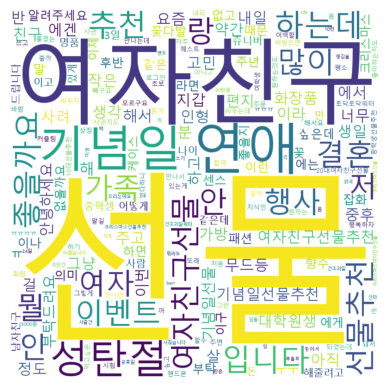

In [48]:
wordCloud = WordCloud(
font_path='malgun'
,background_color='white'
,width=400
,height=400
,scale=2.0
,max_font_size=250
)
wordCloud.generate(resultdata)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
""" 이미지로 마스킹하여 워드 크라우드 그리기 """

from wordcloud import ImageColorGenerator

mask = np.array(Image.open('./img/heart_image.jpg'))

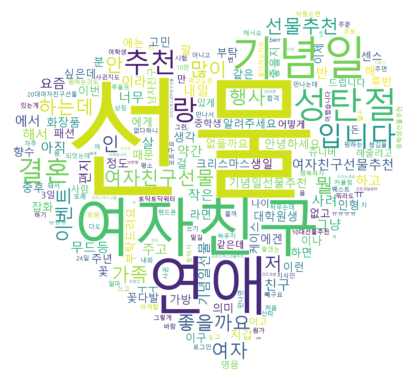

In [54]:
wordCloud = WordCloud(
font_path='malgun'
,background_color='white'
,width=400
,height=400
,scale=2.0
,max_font_size=250
,mask=mask
)
wordCloud.generate(resultdata)

plt.imshow(wordCloud, interpolation='bilinear')
#plt.imshow(wordClold.recolor(color_func=imageColor))
plt.axis('off')
plt.show()